In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# NBER-CES Manufacturing Industry Data

Data Source: NBER-CES Manufacturing Industry Database (1958 to 2011)
https://www.nber.org/research/data/nber-ces-manufacturing-industry-database

In [ ]:
df = pd.read_excel(r"Statistical Data/NBER-CES Manufacturing Industry Data/NBER-CES Manufacturing Industry Database (sic5811).xls")

In [ ]:
df.head()

,sic,year,emp,pay,prode,prodh,prodw,vship,matcost,vadd,...,plant,piship,pimat,piinv,pien,dtfp5,tfp5,dtfp4,tfp4,pctnmfg
0,2011,1958,200.9,1067.8,150.8,309.1,767.7,11950.7,10230.1,1748.6,...,1884.7,0.403,0.343,0.246,0.213,NaN,0.843,NaN,0.843,0.0
1,2011,1959,197.2,1101.0,149.7,312.5,796.9,11788.4,9939.1,1833.2,...,1967.1,0.372,0.321,0.249,0.211,0.033,0.871,0.033,0.871,0.0
2,2011,1960,194.2,1138.6,147.8,312.7,826.2,11806.2,9890.8,1910.7,...,2055.9,0.360,0.326,0.252,0.218,0.049,0.915,0.049,0.915,0.0
3,2011,1961,189.3,1143.2,143.4,302.8,827.4,11916.8,10047.3,1889.2,...,2130.9,0.357,0.318,0.252,0.213,-0.016,0.901,-0.016,0.900,0.0
4,2011,1962,185.6,1161.1,141.7,298.0,844.6,12468.3,10508.8,1986.1,...,2249.8,0.368,0.328,0.255,0.216,0.003,0.903,0.003,0.903,0.0


In [ ]:
device_sic = [3693, 3841, 3842, 3843, 3851]  # From "Managing the Medical Arms Race"

In [ ]:
# Dataframe with target device SIC codes
filt = df["sic"].isin(device_sic)
device_df = df.loc[filt]

# Dataframe without target device SIC codes
other_df = df.loc[~filt]

In [ ]:
# Group the dataframes by year
device_years = device_df.groupby(["year"])
other_years = other_df.groupby(["year"])

## Annual Change in Median 5-factor Total Factor Productivity

In [ ]:
# Produce dictionary of data
device_dtfp5 = {"Medical Device Industry":[], "Other Industries":[]}
for i in range(1959, (2011 + 1)): # +1 because ranges are not inclusive of the last value
    device_dtfp5["Medical Device Industry"].append(device_years.get_group(i)["dtfp5"].median())
    device_dtfp5["Other Industries"].append(other_years.get_group(i)["dtfp5"].median())
    
productivity_df = pd.DataFrame.from_dict(device_dtfp5).set_index(pd.Index(list(range(1959, 2012))))

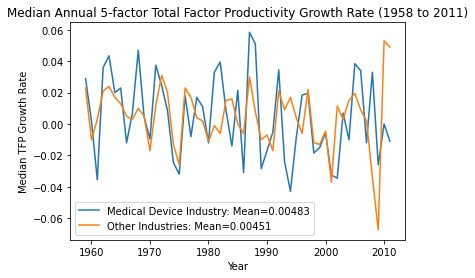

In [ ]:
fig, ax = plt.subplots()
plt.plot(productivity_df)
    
plt.legend(["Medical Device Industry: Mean={}".format(str(round(productivity_df["Medical Device Industry"].mean(), 5))), 
            "Other Industries: Mean={}".format(str(round(productivity_df["Other Industries"].mean(), 5)))], 
            loc ="lower left")
plt.xlabel("Year")
plt.ylabel("Median TFP Growth Rate")
plt.title("Median Annual 5-factor Total Factor Productivity Growth Rate (1958 to 2011)")
    
ax.tick_params(labelrotation=0)

plt.show()

## Annual Change in Variable Sums

In [ ]:
def plot_function(data_df, title):
    fig, ax = plt.subplots()
    plt.plot(data_df)
    
    plt.legend(["Medical Device Industry Mean: {}%".format(str(round(data_df["Medical Device Industry"].mean(), 2))), 
                "Other Industries Mean: {}%".format(str(round(data_df["Other Industries"].mean(), 2)))], 
               loc ="lower left")
    plt.xlabel("Year")
    plt.ylabel("Percent Change")
    plt.title(title)
    
    ax.tick_params(labelrotation=0)
    
    return(plt.show())

In [ ]:
# Sums given varible for each year in device and non-device SIC codes. Returns DF with year-over-year change.
def find_delta_with_sums(column, device_years_inner=device_years, other_years_inner=other_years, start_year=1958, end_year=2011):
    data_dict = {"Medical Device Industry":[], "Other Industries":[]}
    
    device_list = [device_years_inner.get_group(i)[column].sum() for i in range(start_year, (end_year+1))]  # +1 because ranges are not inclusive of the last value
    other_list = [other_years_inner.get_group(i)[column].sum() for i in range(start_year, (end_year+1))]
    
    for i in range(len(range(start_year, end_year))):
        data_dict["Medical Device Industry"].append(((device_list[i + 1]/device_list[i])-1)*100)  # Previous year divided by current year for ratio
        data_dict["Other Industries"].append(((other_list[i + 1]/other_list[i])-1)*100)
    
    return pd.DataFrame.from_dict(data_dict).set_index(pd.Index(list(range(start_year+1, end_year+1))))

### Employment

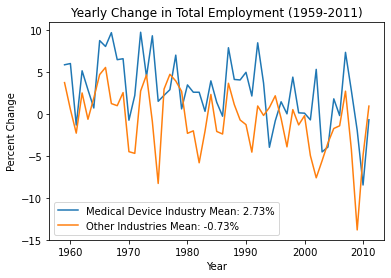

In [ ]:
employment_dict = find_delta_with_sums(column="emp")
plot_function(employment_dict, "Yearly Change in Total Employment (1959-2011)")

### Total Payroll

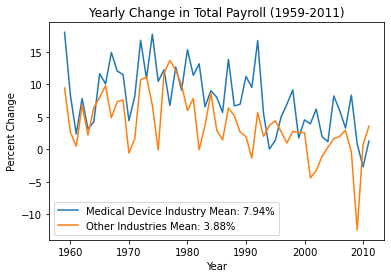

In [ ]:
pay_dict = find_delta_with_sums(column="pay")
plot_function(pay_dict, "Yearly Change in Total Payroll (1959-2011)")

### Material Cost

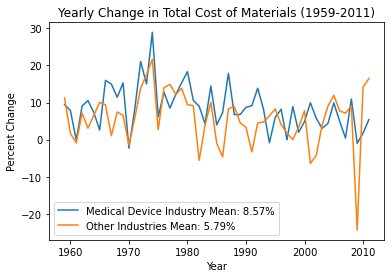

In [ ]:
matcost_dict = find_delta_with_sums(column="matcost")
plot_function(matcost_dict, "Yearly Change in Total Cost of Materials (1959-2011)")

### Value of Shipments

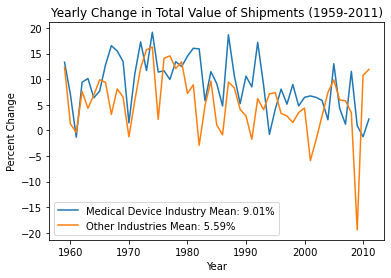

In [ ]:
vship_dict = find_delta_with_sums(column="vship")
plot_function(vship_dict, "Yearly Change in Total Value of Shipments (1959-2011)")

# Historical Statistics of the United States Data

In [ ]:
patents = pd.read_csv(r"Statistical Data/Historical Statistics of the United States/Patent applications filed and patents issued, by type of patent and patentee, 1790–2000/Cg27-37.csv").fillna(0)
funding = pd.read_csv(r"Statistical Data/Historical Statistics of the United States/Expenditures on research and development, by performing sector and source of funding, 1953–2000/Cg110-181.csv").fillna(0)

patents["Year"] = patents["Year"].astype(int)
funding["Year"] = funding["Year"].astype(int)

## Patents & Industry Research Funding

In [ ]:
filt = (patents["Year"] >= 1953)
patents_1953 = patents.loc[filt, ["Year", "PatentsIssued_Inventions_Total_Cg30_Number", "PatentsIssued_Inventions_Corporations_U.S._Cg32_Number", "PatentsIssued_Inventions_U.S.Government_Cg34_Number"]]

In [ ]:
# Chart with 1 axis
# plt.figure(figsize=(15,4))

# for series in patents_1953:
#     if series == "Year":
#         pass
#     else:
#         plt.bar(x=patents_1953["Year"], height=patents_1953[series], label=series)

# colors = ["#26E600", "#000000"]
# for i, series in enumerate(funding[["FederalGovernmentFunds_Cg113_MillionDollars", "ExpendituresByIndustry_IndustryFunds_Cg114_MillionDollars"]]):
#     plt.plot(patents_1953["Year"], funding[series], label=series, color=colors[i], marker="o")
    

# plt.xticks(ticks=patents_1953["Year"], rotation=90)

# plt.xlabel("Year")
# plt.ylabel("Patents Issued (bar) \n Research Expenditure in Millions (line)")
# plt.title("Patents Issued vs Research Expenditure")

# plt.legend()
# plt.show()

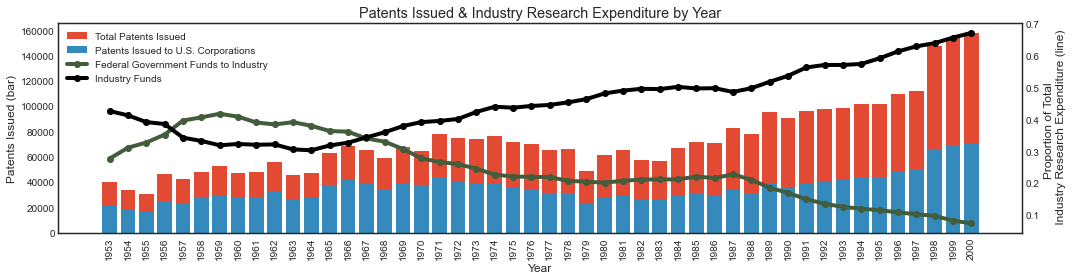

In [ ]:
plt.figure(figsize=(15,4))

ax1 = plt.gca()
ax2 = plt.gca().twinx()

labels = ["Year", "Total Patents Issued", "Patents Issued to U.S. Corporations", "Patents Issued to U.S. Government"]
for i, series in enumerate(patents_1953):
    if series == "Year" or series == "PatentsIssued_Inventions_U.S.Government_Cg34_Number":
        pass
    else:
        ax1.bar(patents_1953["Year"], patents_1953[series], label=labels[i])
        
colors = ["#425C3C", "#000000"]
labels = ["Federal Government Funds to Industry", "Industry Funds"]
for i, series in enumerate(funding[["FederalGovernmentFunds_Cg113_MillionDollars", "ExpendituresByIndustry_IndustryFunds_Cg114_MillionDollars"]]):
    ax2.plot(patents_1953["Year"], (funding[series] / funding["TotalU.S.Expenditures_Cg110_MillionDollars"]), label=labels[i], color=colors[i], marker="o")

ax1.set_xticks(patents_1953["Year"])
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_xlabel("Year")
ax1.set_ylabel("Patents Issued (bar)")
ax2.set_ylabel("Proportion of Total \n Industry Research Expenditure (line)")

# Combine ledgends
art = ax1.get_legend_handles_labels()[0] + ax2.get_legend_handles_labels()[0]
labels = [l.get_label() for l in art]
ax1.legend(art, labels)

plt.style.use('seaborn-white') # Setting style for all subsequent plots
plt.title("Patents Issued & Industry Research Expenditure by Year")
plt.tight_layout()
plt.show()

## University Expenditure

In [ ]:
university_funds = funding[["Total_Cg116_MillionDollars", "FederalGovernmentFunds_Cg117_MillionDollars", "NonfederalGovernmentFunds_Cg118_MillionDollars", 
                            "IndustryFunds_Cg119_MillionDollars", "UniversityAndCollegeFunds_Cg120_MillionDollars", "NonprofitFunds_Cg121_MillionDollars"]]

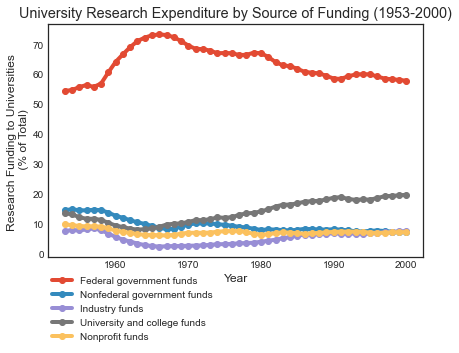

In [ ]:
labels = ["Total funds", "Federal government funds", "Nonfederal government funds", "Industry funds", "University and college funds", "Nonprofit funds"]

for i, series in enumerate(university_funds):
    if series == "Total_Cg116_MillionDollars":
        pass
    else:
        plt.plot(funding["Year"], (university_funds[series] / university_funds["Total_Cg116_MillionDollars"]) * 100, label=labels[i], marker="o")

plt.title("University Research Expenditure by Source of Funding (1953-2000)")
plt.xlabel("Year")
plt.ylabel("Research Funding to Universities \n (% of Total)")
plt.legend(loc=[0, -0.38])
plt.show()

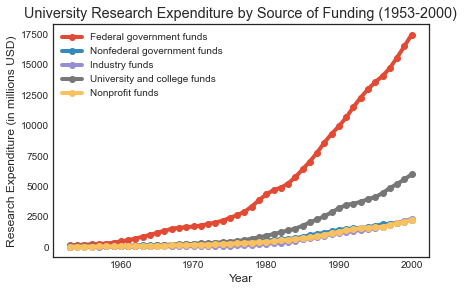

In [ ]:
labels = ["Total funds", "Federal government funds", "Nonfederal government funds", "Industry funds", "University and college funds", "Nonprofit funds"]

for i, series in enumerate(university_funds):
    if series == "Total_Cg116_MillionDollars":
        pass
    else:
        plt.plot(funding["Year"], university_funds[series], label=labels[i], marker="o")

plt.title("University Research Expenditure by Source of Funding (1953-2000)")
plt.xlabel("Year")
plt.ylabel("Research Expenditure (in millions USD)")
plt.legend()
plt.show()

### Basic, Applied and Developmental Research

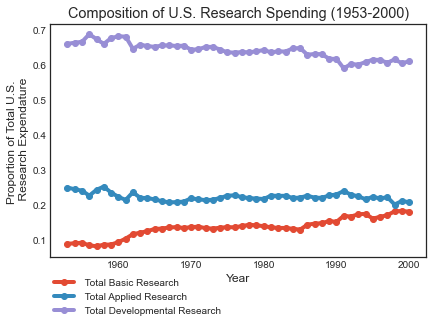

In [ ]:
def divide_total(series):
    percent = (series /  funding["TotalU.S.Expenditures_Cg110_MillionDollars"])
    return percent

plt.plot(funding["Year"], divide_total(funding["BasicResearch_TotalU.S.Expenditures_Cg128_MillionDollars"]), label=" Total Basic Research", marker="o")
plt.plot(funding["Year"], divide_total(funding["AppliedResearch_TotalU.S.Expenditures_Cg146_MillionDollars"]), label=" Total Applied Research", marker="o")
plt.plot(funding["Year"], divide_total(funding["Development_TotalU.S.Expenditures_Cg164_MillionDollars"]), label=" Total Developmental Research", marker="o")

plt.title("Composition of U.S. Research Spending (1953-2000)")
plt.xlabel("Year")
plt.ylabel("Proportion of Total U.S. \n Research Expendature")

plt.legend(loc=[0, -0.27])
plt.show()

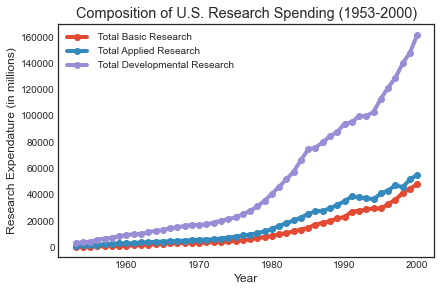

In [ ]:
plt.plot(funding["Year"], funding["BasicResearch_TotalU.S.Expenditures_Cg128_MillionDollars"], label=" Total Basic Research", marker="o")
plt.plot(funding["Year"], funding["AppliedResearch_TotalU.S.Expenditures_Cg146_MillionDollars"], label=" Total Applied Research", marker="o")
plt.plot(funding["Year"], funding["Development_TotalU.S.Expenditures_Cg164_MillionDollars"], label=" Total Developmental Research", marker="o")

plt.title("Composition of U.S. Research Spending (1953-2000)")
plt.xlabel("Year")
plt.ylabel("Research Expendature (in millions USD)")

plt.legend()
plt.show()

# FDA Device Registration and Lising

Data Source: https://www.fda.gov/medical-devices/device-registration-and-listing/establishment-registration-and-medical-device-listing-files-download

These files are updated by the FDA every Sunday night. Most recent download: 2021-02-18

"Product Code: 3 character unique product identifier" (https://www.fda.gov/medical-devices/classify-your-medical-device/download-product-code-classification-files). Describes the type of product. List of codes at link.

In [ ]:
# For PC
raw_pcd = pd.read_csv("./Statistical Data/FDA Device Registration and Lising/Listing_PCD.txt", sep = "|")
raw_own_op = pd.read_csv("./Statistical Data/FDA Device Registration and Lising/Owner_Operator.txt", sep="|")
raw_product_code = pd.read_csv("./Statistical Data/FDA Device Registration and Lising/foiclass.txt", sep = "|")

In [2]:
#For Google Colab
raw_pcd = pd.read_csv("/content/Listing_PCD.txt", sep = "|", encoding= "unicode_escape")
raw_own_op = pd.read_csv("/content/Owner_Operator.txt", sep = "|", encoding= "unicode_escape")
raw_product_code = pd.read_csv("/content/foiclass.txt", sep = "|", encoding= "unicode_escape")

### Test Join Behavior

In [ ]:
a = pd.DataFrame({"col1": ["A", "A", "B"], "col2":[1,2,3]})
b = pd.DataFrame({"col1": ["A", "B"], "col3":[4,5]})

In [ ]:
test = a.join(b.set_index("col1"), on="col1", how="left")
test

,col1,col2,col3
0,A,1,4
1,A,2,4
2,B,3,5


### Data Notes

There are duplicate Owner Operator Numbers in the PCD table

In [ ]:
print(len(pcd["OWNER_OPERATOR_NUMBER"]))
print(len(pcd["OWNER_OPERATOR_NUMBER"].unique()))

303645
34666


Firms do not always have the same owner operator number

In [ ]:
print(len(own_op["FIRM_NAME"].unique()))
print(len(own_op["OWNER_OPERATOR_NUMBER"].unique()))

38904
39115


### Cleaning and Formatting

In [3]:
# Add owner operator info to pcb table
own_op_nodup = raw_own_op.drop_duplicates(subset=["OWNER_OPERATOR_NUMBER"], keep="last") # Merge own_op duplicates
full_pcd = raw_pcd.join(own_op_nodup.set_index("OWNER_OPERATOR_NUMBER"), on="OWNER_OPERATOR_NUMBER", how="left")
full_pcd["CREATED_DATE"] = pd.to_datetime(full_pcd["CREATED_DATE"], format="%m/%d/%Y")  # Converte new table to datetime

In [4]:
# Remove product codes not associated with a Class 3 device
prod_cod = raw_product_code.loc[raw_product_code["DEVICECLASS"]== "3"][["MEDICALSPECIALTY", "PRODUCTCODE", "DEVICENAME", "Implant_Flag", "Life_Sustain_support_flag"]]
pcd = full_pcd.loc[full_pcd["PRODUCT_CODE"].isin(prod_cod["PRODUCTCODE"])]

### Analysis

PCD Listing Volume

In [ ]:
def pcd_activity_plot(pcd_df, title):
    x = []
    y= []

    pcd_date = pcd_df.groupby("CREATED_DATE")
    for group in pcd_date:
        x.append(group[0])
        y.append(pcd_date.get_group(group[0]).shape[0])

    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Listing Volume")

    plt.scatter(x, y)
    plt.tight_layout()
    plt.show()

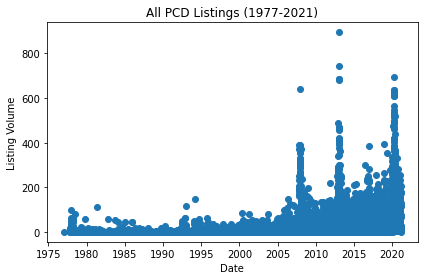

In [ ]:
pcd_activity_plot(full_pcd, "Daily Volume of PCD Listings (1977-2021)")

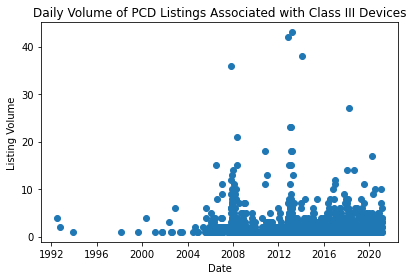

In [ ]:
pcd_activity_plot(pcd, "Daily Volume of PCD Listings Associated with Class III Devices")

Cumulative Total of Most Popular Device PCD Listings

In [25]:
def pcd_activity_popular(pcd_df, title, firm_data=False, raw_product_code=raw_product_code):
    # Extract Data
    if firm_data is True:
        pcd_counter = Counter(pcd_df["FIRM_NAME"])
    else:
        pcd_counter = Counter(pcd_df["PRODUCT_CODE"])
    code_list = [x[0] for x in pcd_counter.most_common(10)]

    data = {}

    for code in code_list:
        if firm_data is True:
            temp_df = pcd_df.loc[pcd_df["FIRM_NAME"] == code]
        else:
            temp_df = pcd_df.loc[pcd_df["PRODUCT_CODE"] == code]
        temp_df = temp_df.sort_values(by="CREATED_DATE").reset_index(drop=True)
        x = []
        y = []
        for i,row in temp_df.iterrows():
            x.append(row[2])
            y.append(i)
            data[code] = (x,y)
    
    # Create Plot
    plt.figure(figsize=(8,5))
    for code in data:
        plt.plot(data[code][0], data[code][1], label=code)

    plt.title(title)
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("Total Listings")

    if firm_data is True:
        plt.legend(loc=[0, -0.70])
    else:
        plt.legend()
    plt.show()

    # Print Key Key
    if firm_data is False:
        temp_code = raw_product_code.loc[raw_product_code["PRODUCTCODE"].isin(code_list)]
        print(temp_code[["PRODUCTCODE", "DEVICENAME"]])


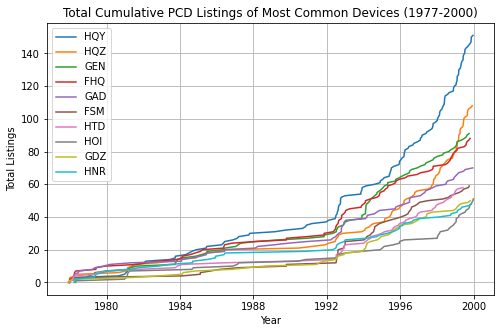

     PRODUCTCODE                                         DEVICENAME
1885         FHQ                  Holder, Needle, Gastroenterologic
4353         HNR                                Forceps, Ophthalmic
4368         HOI                              Spectacle, Magnifying
4425         HQY  Sunglasses (Non-Prescription Including Photose...
4426         HQZ                                   Frame, Spectacle
5656         FSM                         Tray, Surgical, Instrument
5731         GAD                                          Retractor
5785         GDZ                                    Handle, Scalpel
5795         GEN                 Forceps, General & Plastic Surgery
5822         HTD                                            Forceps


In [9]:
pcd_activity_popular(full_pcd.loc[full_pcd["CREATED_DATE"] < datetime(2000, 1, 1)], 
                     "Total Cumulative PCD Listings of Most Common Devices (1977-2000)",
                     firm_data=False, raw_product_code=raw_product_code)

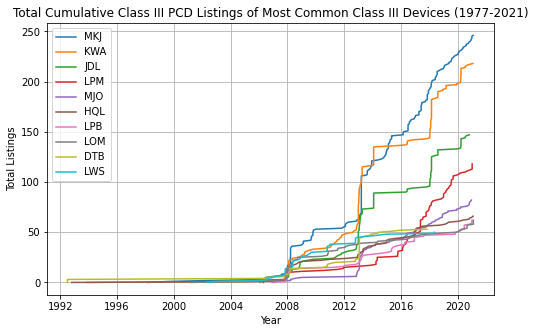

     PRODUCTCODE                                         DEVICENAME
795          DTB                      Permanent Pacemaker Electrode
893          MKJ   Automated External Defibrillators (Non-Wearable)
1032         LPB             Cardiac Ablation Percutaneous Catheter
1038         LWS   Implantable Cardioverter Defibrillator (Non-Crt)
3691         LOM  Test, Hepatitis B (B Core, Be Antigen, Be Anti...
4414         HQL                                   Intraocular Lens
4447         LPM                Lenses, Soft Contact, Extended Wear
4645         JDL  Prosthesis, Hip, Semi-Constrained (Metal Cemen...
4679         KWA  Prosthesis, Hip, Semi-Constrained (Metal Uncem...
4850         MJO                    Prosthesis, Intervertebral Disc


In [10]:
pcd_activity_popular(pcd, "Total Cumulative Class III PCD Listings of Most Common Class III Devices (1977-2021)",
                     firm_data=False, raw_product_code=raw_product_code)

Company Activity

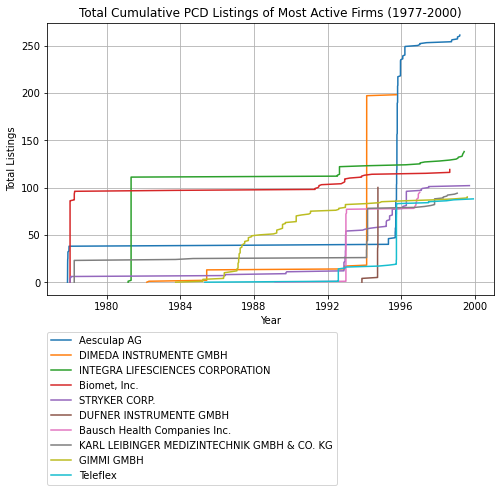

In [26]:
pcd_activity_popular(full_pcd.loc[full_pcd["CREATED_DATE"] < datetime(2000, 1, 1)], 
                     "Total Cumulative PCD Listings of Most Active Firms (1977-2000)",
                     firm_data=True, raw_product_code=raw_product_code)

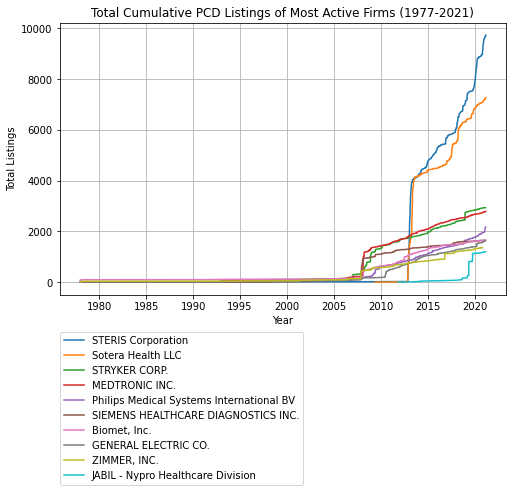

In [27]:
pcd_activity_popular(full_pcd, "Total Cumulative PCD Listings of Most Active Firms (1977-2021)",
                     firm_data=True, raw_product_code=raw_product_code)